In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [5]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [7]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

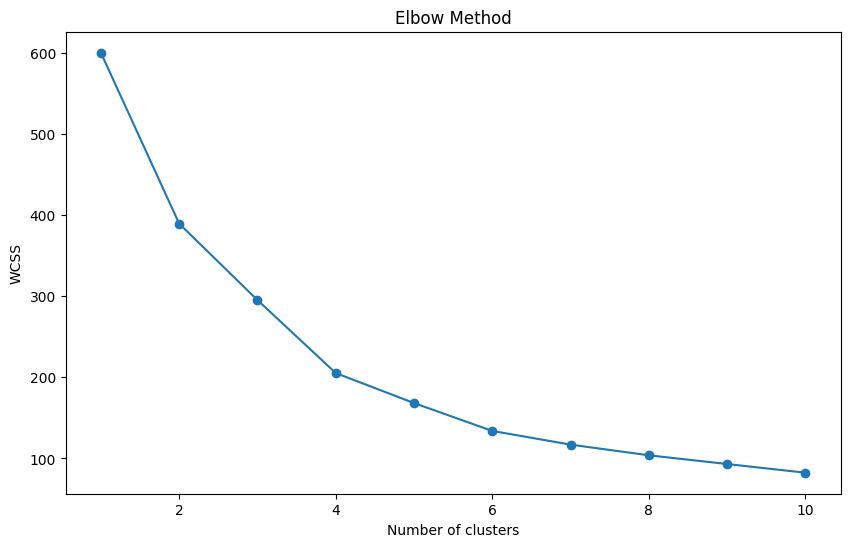

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters

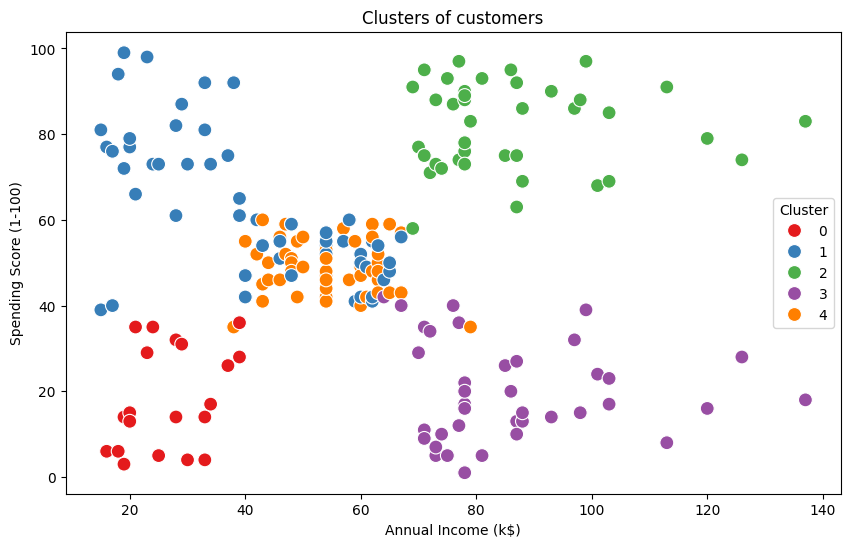

[[ 0.5310735  -1.2905084  -1.23646671]
 [-0.98067852 -0.74305983  0.46744035]
 [-0.42880597  0.97484722  1.21608539]
 [ 0.07333084  0.97494509 -1.19729675]
 [ 1.20484056 -0.23577338 -0.05236781]]


In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
print(kmeans.cluster_centers_)

In [14]:
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.41664341513732767


In [15]:
df.to_csv('Mall_Customers_Clustered.csv', index=False)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
kmeans_pca = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_features)
silhouette_avg_pca = silhouette_score(pca_features, clusters_pca)
print(f'Silhouette Score after PCA: {silhouette_avg_pca}')

Silhouette Score after PCA: 0.39308250061186895


In [17]:
kmeans_new = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_new = kmeans_new.fit_predict(scaled_features)
silhouette_avg_new = silhouette_score(scaled_features, clusters_new)
print(f'Silhouette Score with 4 clusters: {silhouette_avg_new}')

Silhouette Score with 4 clusters: 0.4039582785148566


In [18]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(scaled_features)
silhouette_avg_dbscan = silhouette_score(scaled_features, clusters_dbscan)
print(f'Silhouette Score with DBSCAN: {silhouette_avg_dbscan}')

Silhouette Score with DBSCAN: 0.18451372756506046


In [19]:
kmeans_tuned = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=20, random_state=42)
clusters_tuned = kmeans_tuned.fit_predict(scaled_features)
silhouette_avg_tuned = silhouette_score(scaled_features, clusters_tuned)
print(f'Silhouette Score after tuning: {silhouette_avg_tuned}')

Silhouette Score after tuning: 0.41664341513732767


In [20]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(scaled_features)
df_no_outliers = df[outliers == 1]
scaled_features_no_outliers = scaled_features[outliers == 1]
kmeans_no_outliers = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_no_outliers = kmeans_no_outliers.fit_predict(scaled_features_no_outliers)
silhouette_avg_no_outliers = silhouette_score(scaled_features_no_outliers, clusters_no_outliers)
print(f'Silhouette Score after removing outliers: {silhouette_avg_no_outliers}')

Silhouette Score after removing outliers: 0.4329448330352376


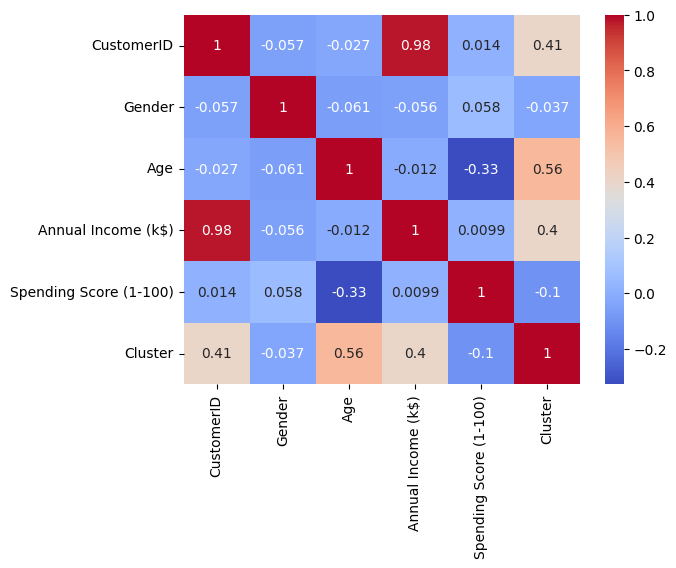

In [21]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [22]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=42)
clusters_gmm = gmm.fit_predict(scaled_features)
silhouette_avg_gmm = silhouette_score(scaled_features, clusters_gmm)
print(f'Silhouette Score with GMM: {silhouette_avg_gmm}')

Silhouette Score with GMM: 0.37644074990819204


In [23]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=5, random_state=42, affinity='nearest_neighbors')
clusters_spectral = spectral.fit_predict(scaled_features)
silhouette_avg_spectral = silhouette_score(scaled_features, clusters_spectral)
print(f'Silhouette Score with Spectral Clustering: {silhouette_avg_spectral}')

Silhouette Score with Spectral Clustering: 0.3734062594415012


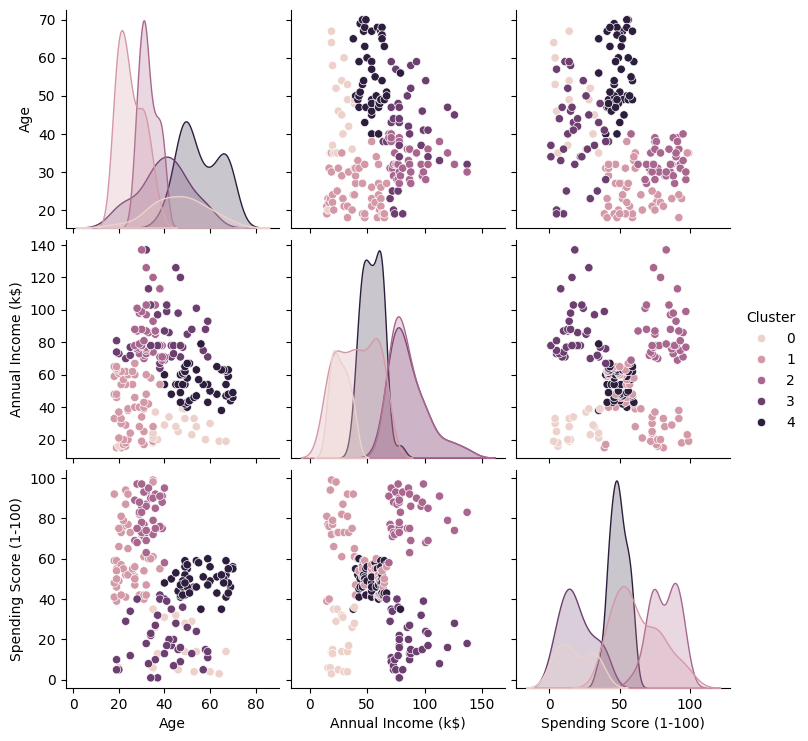

In [24]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster')
plt.show()

In [25]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_clusters = gmm.fit_predict(scaled_features)
silhouette_avg_gmm = silhouette_score(scaled_features, gmm_clusters)
print(f'Silhouette Score with GMM: {silhouette_avg_gmm}')

Silhouette Score with GMM: 0.37644074990819204


In [27]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=5, assign_labels='discretize', random_state=42)
spectral_clusters = spectral.fit_predict(scaled_features)
silhouette_avg_spectral = silhouette_score(scaled_features, spectral_clusters)
print(f'Silhouette Score with Spectral Clustering: {silhouette_avg_spectral}')

Silhouette Score with Spectral Clustering: 0.8340756396495118


In [28]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo_clusters = agglo.fit_predict(scaled_features)
silhouette_avg_agglo = silhouette_score(scaled_features, agglo_clusters)
print(f'Silhouette Score with Agglomerative Clustering: {silhouette_avg_agglo}')

Silhouette Score with Agglomerative Clustering: 0.39002826186267214


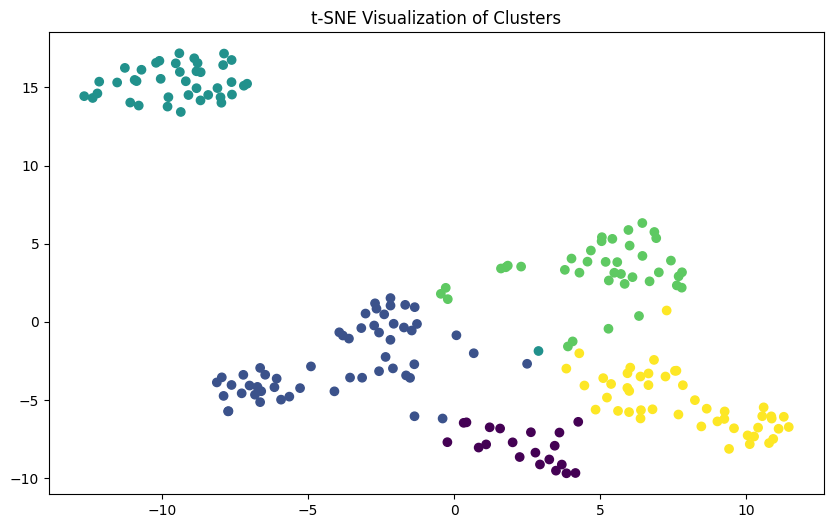

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_features)
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=clusters, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.show()

In [36]:
kmeans_alt = KMeans(n_clusters=5, init='random', max_iter=1000, n_init=20, random_state=42)
clusters_alt = kmeans_alt.fit_predict(scaled_features)
silhouette_avg_alt = silhouette_score(scaled_features, clusters_alt)
print(f'Silhouette Score with random initialization: {silhouette_avg_alt}')

Silhouette Score with random initialization: 0.41664341513732767
